<a href="https://colab.research.google.com/github/vinaykumar2491/Project_MachineLearning/blob/master/imflash217_fastai_1_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ToDo:
1.Build world-class image classifier.
2. 

In [0]:
!nvidia-smi

Sat Oct  5 13:39:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
### Setting hyperparams
bs = 16             ## batch-size

## Oxford-IIIT Pets Dataset
```
It has the following features:
    1. Only dogs and cats breeds images
    2. 12 cat-breeds and 25 dog-breeds
    3. Labels are stored in the image filenames itself.

    4. Best accuracy in 2012 was 59.21%

``` 

In [0]:
path = untar_data(URLs.PETS)
print(path, "\n")
path.ls()

/root/.fastai/data/oxford-iiit-pet 



[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/"annotations"
path_img  = path/"images"

In [0]:
path_anno.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/README'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations/xmls')]

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_137.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_134.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_131.jpg')]

In [0]:
np.random.seed(217)

In [0]:
re_pat = r"/([^/]+)_\d+.jpg$"

In [0]:
data = ImageDataBunch.from_name_re(path=path_img, fnames=fnames, pat=re_pat,
                                   ds_tfms=get_transforms(), size=224, bs=bs).normalize()

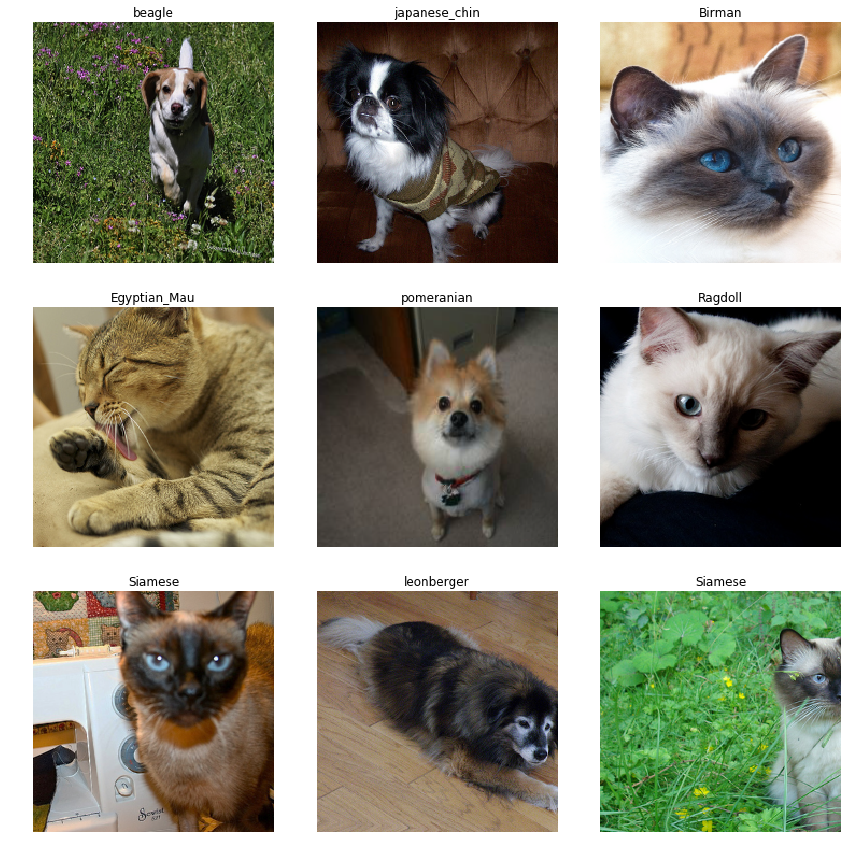

In [0]:
data.show_batch(rows=3)

In [0]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
data.c

37

In [0]:
len(data.classes)

37

## Training RESNET34

In [0]:
learner = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 107MB/s] 


In [0]:
learner.data.train_ds

LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Egyptian_Mau,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images

In [0]:
learner.data.valid_ds

LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,japanese_chin,Persian,Bombay,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images

In [0]:
learner.data.show_batch

<bound method DataBunch.show_batch of ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Egyptian_Mau,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,japanese_chin,Persian,Bombay,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None>

In [0]:
learner.fit_one_cycle(cyc_len=4)

epoch,train_loss,valid_loss,error_rate,time
0,0.900104,0.372579,0.115697,01:48
1,0.752740,0.359430,0.114344,01:48
2,0.521657,0.246813,0.075101,01:48
3,0.387756,0.227636,0.066306,01:49


In [0]:
learner.save("resnet34_stage1")

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
losses, idxs = interp.top_losses()

In [0]:
len(losses) == len(idxs) == len(data.valid_ds)

True

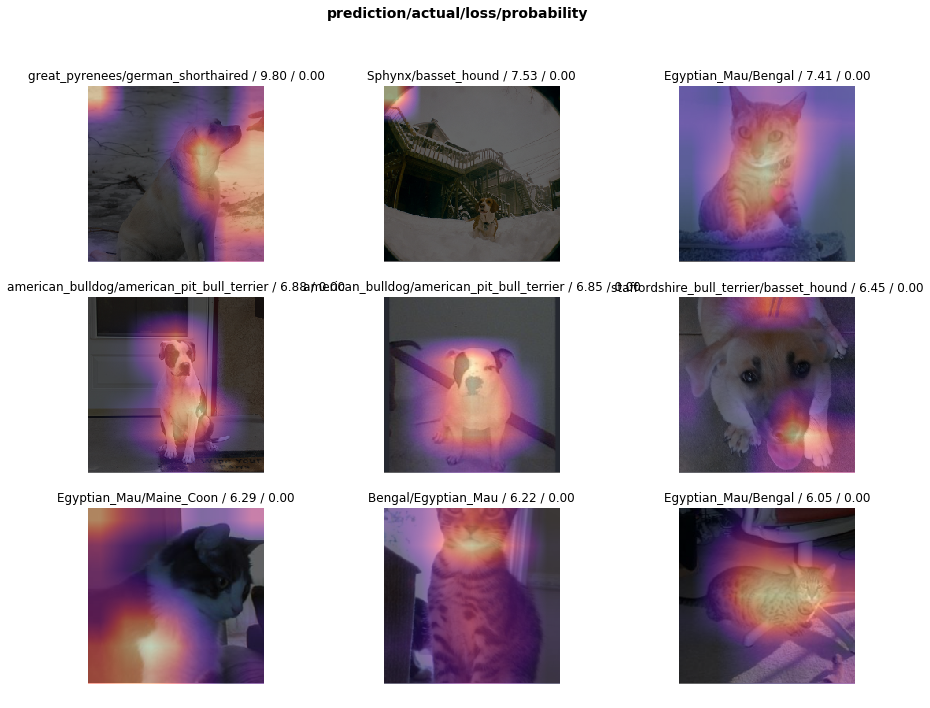

In [0]:
interp.plot_top_losses(k=9, figsize=(15,11), heatmap=True)

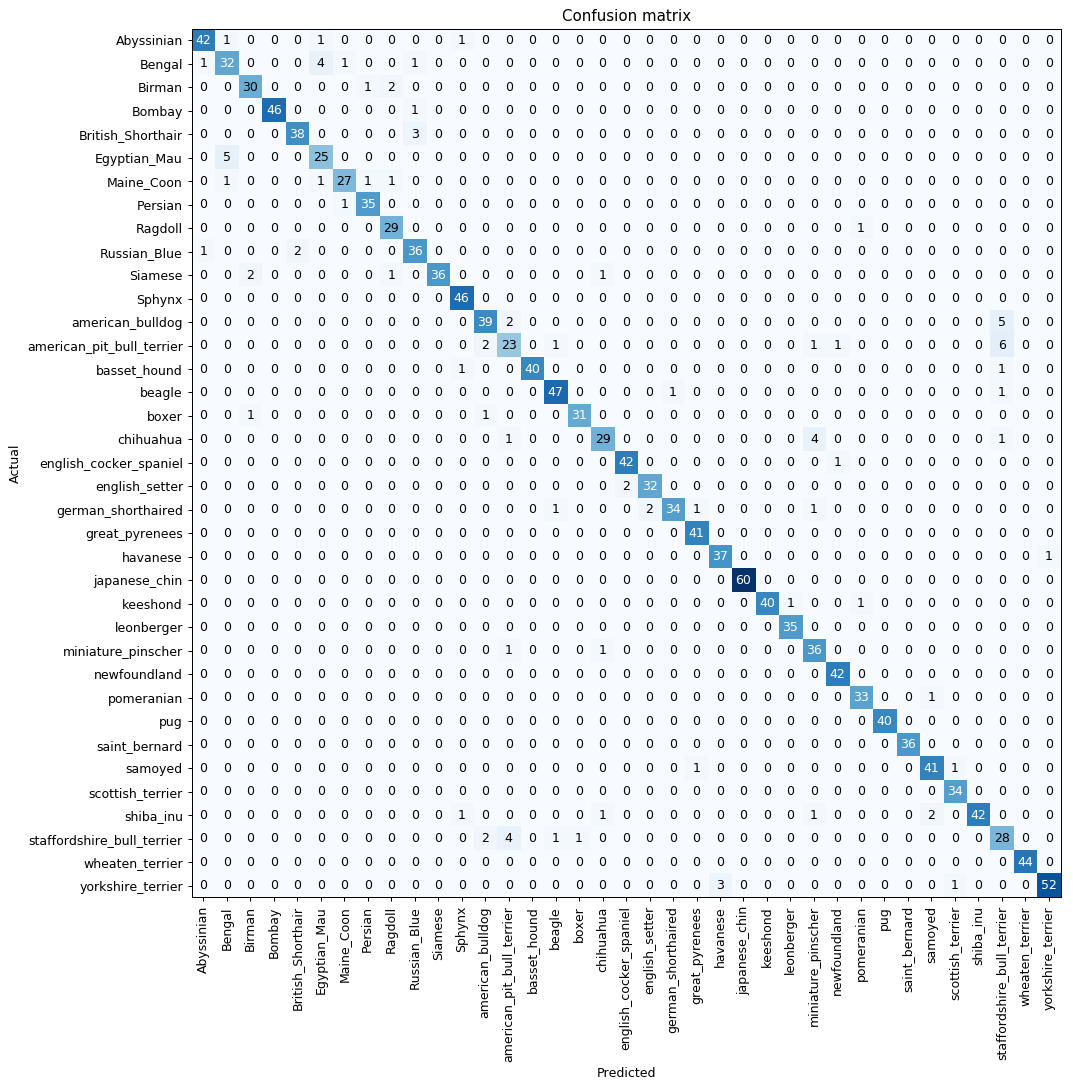

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=90)

In [0]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('yorkshire_terrier', 'havanese', 3)]

In [0]:
learner.model[-1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=37, bias=True)
)

In [0]:
### Unfreezing the rest of the pretrained model
learner.unfreeze()

In [0]:
### Training the whole model on our dataset
learner.fit_one_cycle(cyc_len=4)

epoch,train_loss,valid_loss,error_rate,time
0,1.323272,1.285815,0.324087,01:54
1,1.270248,0.812419,0.253045,01:53
2,0.692375,0.371977,0.119080,01:54
3,0.337565,0.277390,0.091340,01:54


In [0]:
### Here our model has performed reasonabelly well; so we can either retain this model or load the earlier checkpoint

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


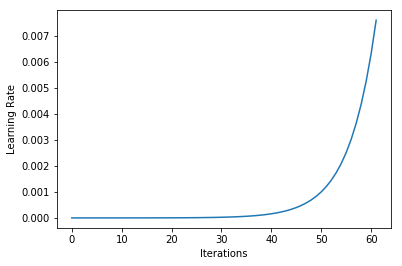

In [0]:
learner.recorder.plot_lr()

In [0]:
learner.save("resnet34_stage2_unfrozen")

In [0]:
learner.load("resnet34_stage1")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Egyptian_Mau,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,japanese_chin,Persian,Bombay,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


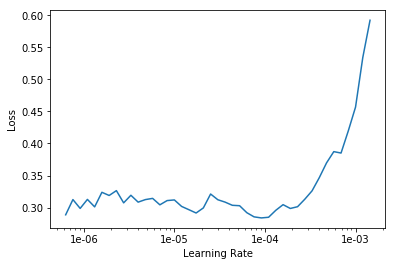

In [0]:
learner.recorder.plot()

In [0]:
learner.load("resnet34_stage2_unfrozen")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Egyptian_Mau,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,japanese_chin,Persian,Bombay,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


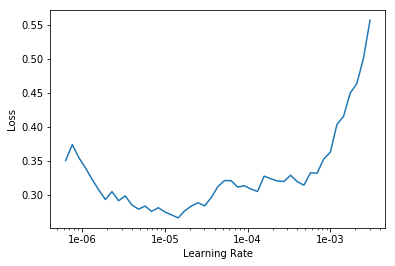

In [0]:
learner.recorder.plot()

In [0]:
learner.load("resnet34_stage1")

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Egyptian_Mau,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,japanese_chin,Persian,Bombay,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [0]:
learner.unfreeze()

In [0]:
learner.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.331618,0.217326,0.066982,01:57
1,0.322373,0.211919,0.065629,01:57


In [0]:
learner.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.311065,0.211974,0.062923,01:58
1,0.293194,0.198143,0.062923,01:58


## Training RESNET50

In [0]:
### We will use bigger images to train resnet50 model
### If we want we can decrease our batchsize as well to accomodate for bigger images & bigger model
data = ImageDataBunch.from_name_re(path=path, fnames=fnames, pat=re_pat, size=299,
                                   ds_tfms=get_transforms(), bs=bs).normalize(imagenet_stats)

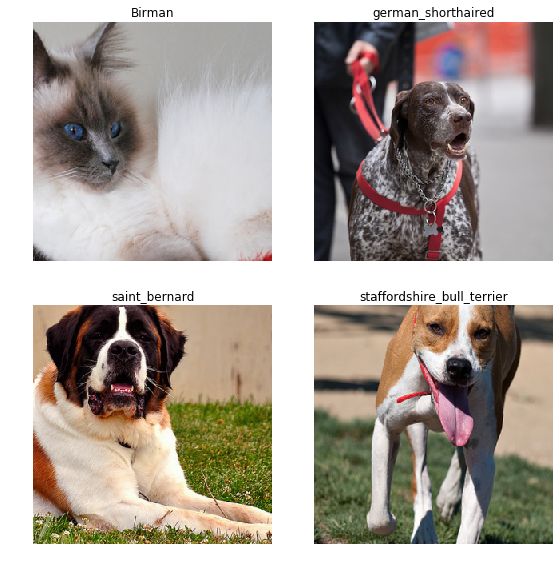

In [0]:
data.show_batch(rows=2)

In [0]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
german_shorthaired,Ragdoll,shiba_inu,beagle,Bengal
Path: /root/.fastai/data/oxford-iiit-pet;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
staffordshire_bull_terrier,British_Shorthair,Egyptian_Mau,english_cocker_spaniel,scottish_terrier
Path: /root/.fastai/data/oxford-iiit-pet;

Test: None

In [0]:
learner = cnn_learner(data=data, base_arch=models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 107MB/s]


In [0]:
learner.model[-1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=512, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=37, bias=True)
)

In [0]:
learner.model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


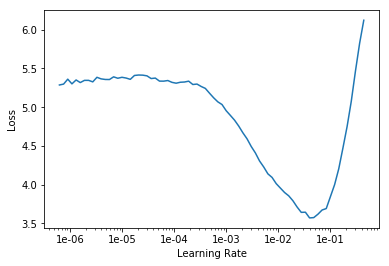

In [0]:
learner.recorder.plot()

In [0]:
### Trainign the last layers only
### Rest of the pretrained model params are forzen
learner.fit_one_cycle(cyc_len=8)

epoch,train_loss,valid_loss,error_rate,time
0,0.697294,0.303004,0.102165,03:41
1,0.716791,0.340116,0.107578,03:37
2,0.540147,0.368344,0.097429,03:35
3,0.427910,0.251104,0.066306,03:35
4,0.347151,0.221429,0.055480,03:36
5,0.289252,0.189902,0.054804,03:36
6,0.208649,0.166939,0.050744,03:35
7,0.187195,0.159167,0.050744,03:35


In [0]:
learner.save("resnet50_stage1")

In [0]:
learner.unfreeze()

In [0]:
learner.fit_one_cycle(cyc_len=2, max_lr=slice(5e-4, 5e-2))

epoch,train_loss,valid_loss,error_rate,time
0,4.627259,23.864716,0.933018,04:46
1,3.072686,102.445786,0.817321,04:43


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


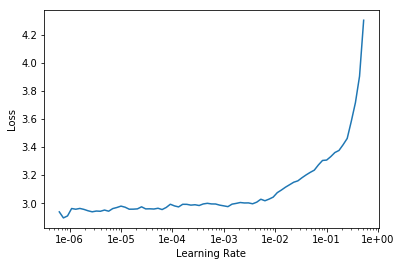

In [0]:
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.930708,48.028088,0.785521,04:41
1,2.624941,139.531845,0.728687,04:44


In [0]:
learner.load("resnet50_stage1")
learner.unfreeze()
learner.fit_one_cycle(cyc_len=2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.179101,0.170137,0.048714,04:44
1,0.142205,0.156725,0.043978,04:45
